In [25]:
# download the data file from the drive
!curl -LOJ 'https://drive.google.com/uc?export=download&id=17KDl-ktcg5yOZLAbodtMDqwFACdv87zb'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1289      0 --:--:-- --:--:-- --:--:--  1289
  2 55628    2  1377    0     0   2663      0  0:00:20 --:--:--  0:00:20  2663
curl: (23) Failed writing body (0 != 1377)


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
# converting sex, smoker, region into categorical varibale 
from sklearn.preprocessing import LabelEncoder

# sex
data.sex = LabelEncoder().fit_transform(data.sex) 

# smoker or not
data.smoker = LabelEncoder().fit_transform(data.smoker)

# region
data.region = LabelEncoder().fit_transform(data.region)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


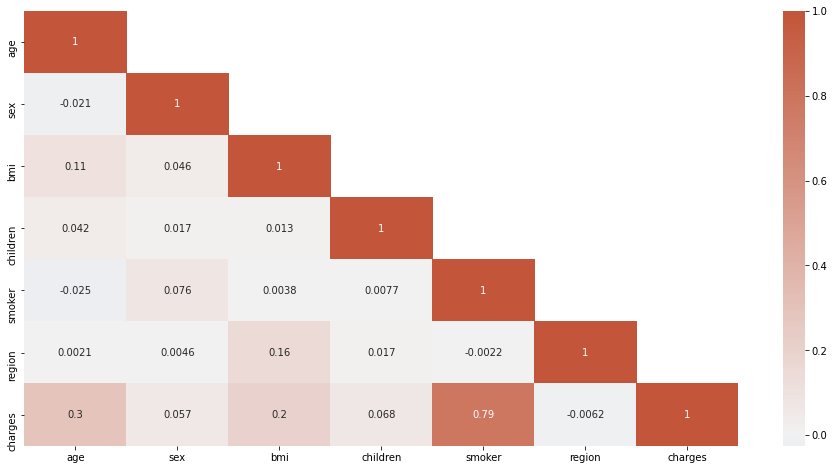

In [30]:
# get the correlation
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(16,8))
# sns.heatmap(corr, mask=mask, annot=True)
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(240,20,as_cmap=True), center=0, annot=True)
plt.show()

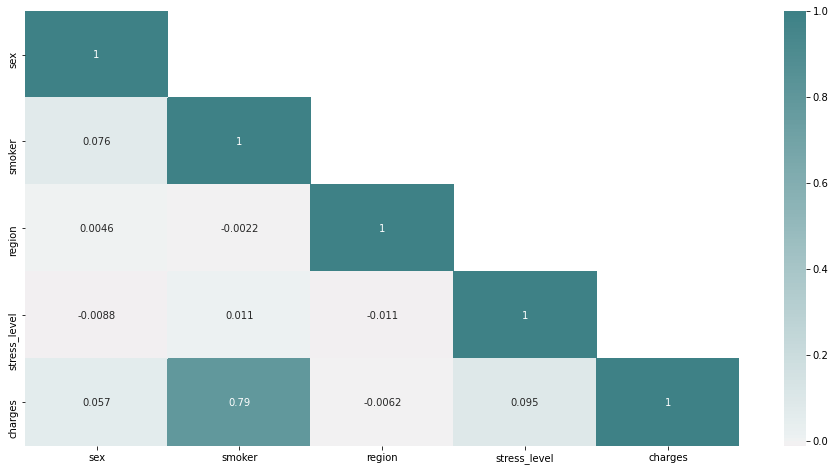

In [31]:
data_c = data
data_c["stress_level"] = data_c["children"] * data_c["age"] / data_c["bmi"]

data_c = data_c.drop(['children'], axis = 1)
data_c = data_c.drop(['age'], axis = 1)
data_c = data_c.drop(['bmi'], axis = 1)

y = data['charges']
data_c = data_c.drop(['charges'], axis = 1)
data_c["charges"] = y

# get the correlation
corr = data_c.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(16,8))
# sns.heatmap(corr, mask=mask, annot=True)
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(340,200,as_cmap=True), center=0, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


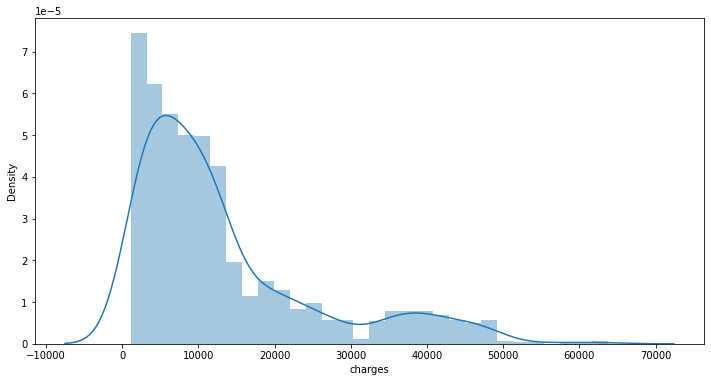

In [32]:
# to observe the distribution of the charges
plt.figure(figsize=(12,6))
sns.distplot(data['charges'])

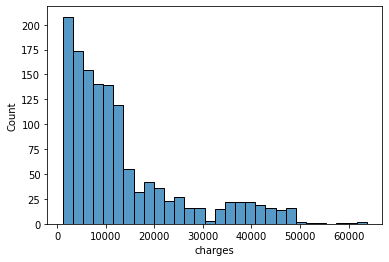

In [33]:
sns.histplot(data=data, x="charges")

In [34]:
# sns.pairplot(data)

Plotting many distributions

The pairplot() function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

In [35]:
# g = sns.PairGrid(data)
# g.map_upper(sns.histplot)
# g.map_lower(sns.kdeplot, fill=True)
# g.map_diag(sns.histplot, kde=True)

As with jointplot()/JointGrid, using the underlying PairGrid directly will afford more flexibility with only a bit more typing:

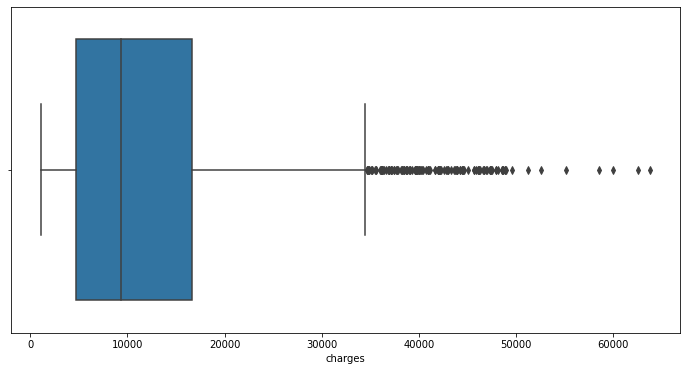

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x='charges', data=data)

In [37]:
# remove the outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ",IQR)

data_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(len(data))
print(len(data_iqr))
print('outlier removed:', len(data) - len(data_iqr))

IQR:  age                24.000000
sex                 1.000000
bmi                 8.397500
children            2.000000
smoker              0.000000
region              1.000000
charges         11899.625365
stress_level        2.384997
dtype: float64
1338
1033
outlier removed: 305


In [38]:
# converting sex, smoker, region into categorical varibale 
from sklearn.preprocessing import LabelEncoder

# sex
data_iqr.sex = LabelEncoder().fit_transform(data_iqr.sex) 

# smoker or not
data_iqr.smoker = LabelEncoder().fit_transform(data_iqr.smoker)

# region
data_iqr.region = LabelEncoder().fit_transform(data_iqr.region)

data_iqr.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,sex,bmi,children,smoker,region,charges,stress_level
1,18,1,33.770,1,0,2,1725.55230,0.533017
2,28,1,33.000,3,0,2,4449.46200,2.545455
3,33,1,22.705,0,0,1,21984.47061,0.000000
4,32,1,28.880,0,0,1,3866.85520,0.000000
5,31,0,25.740,0,0,2,3756.62160,0.000000


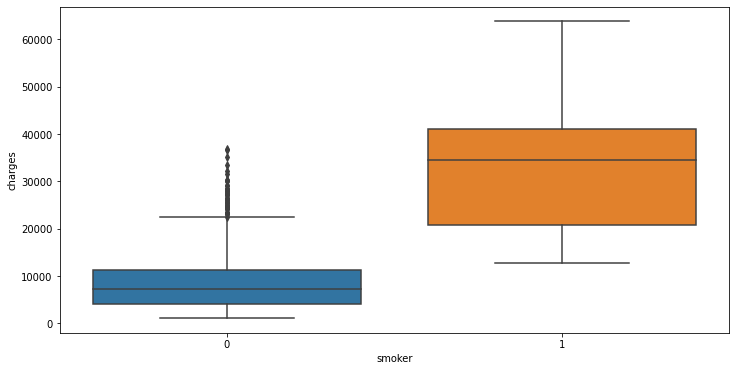

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='smoker', y='charges', data=data)

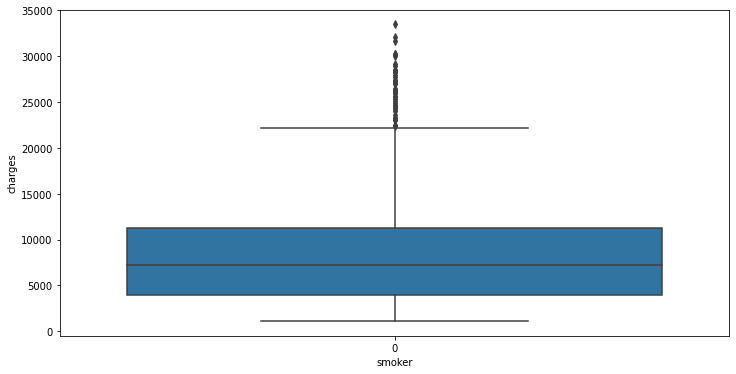

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x='smoker', y='charges', data=data_iqr)

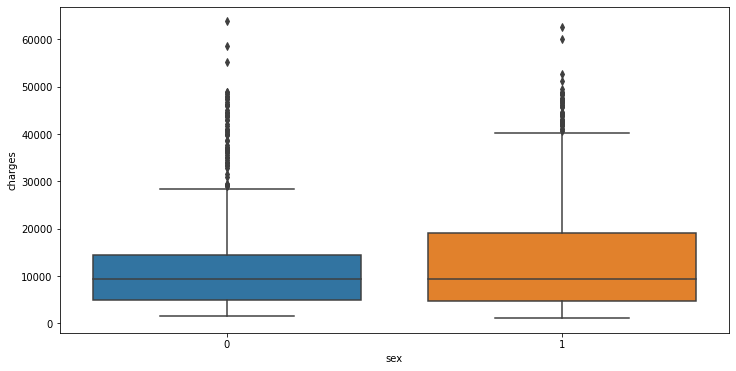

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex', y='charges', data=data)

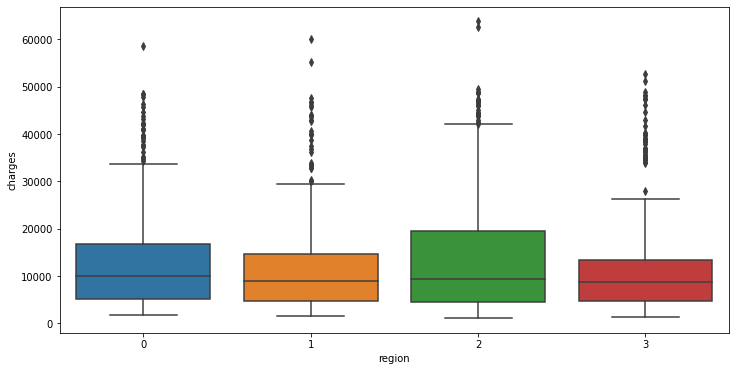

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='charges', data=data)

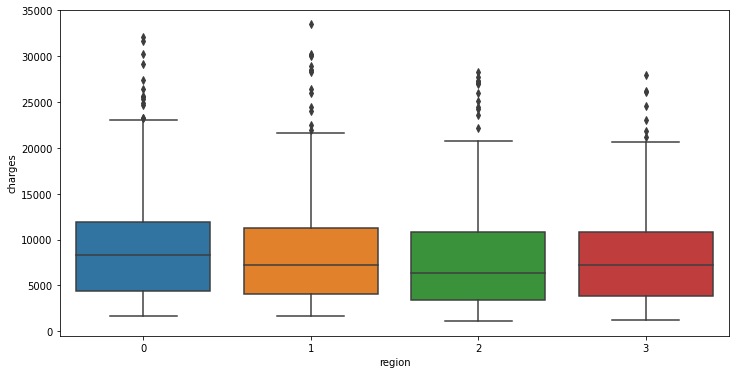

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='charges', data=data_iqr)

Now see the difference between data and data_iqr, the dots are not really outlier.

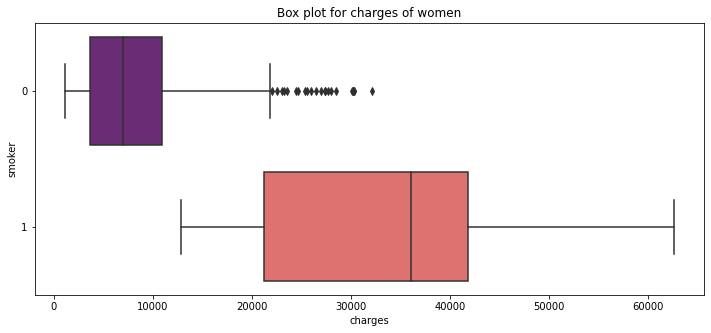

In [44]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

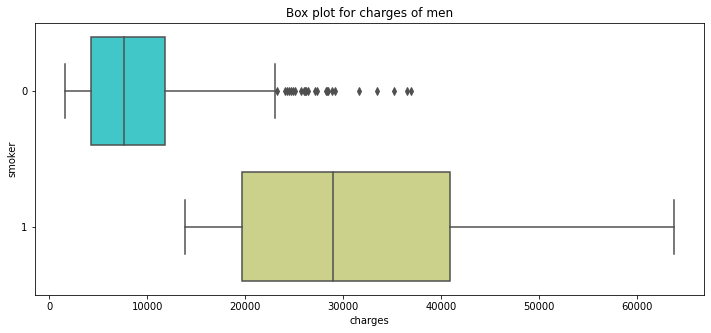

In [45]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


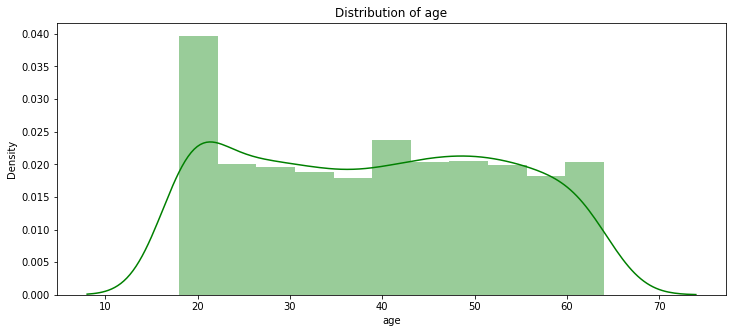

In [46]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (20 years old)')

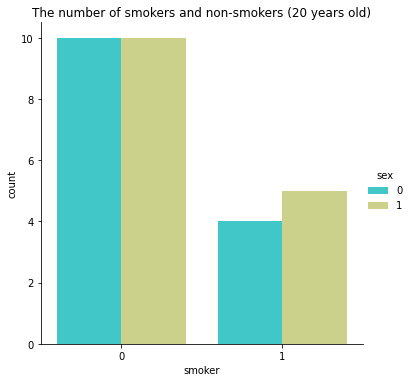

In [47]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 20)])
plt.title("The number of smokers and non-smokers (20 years old)")

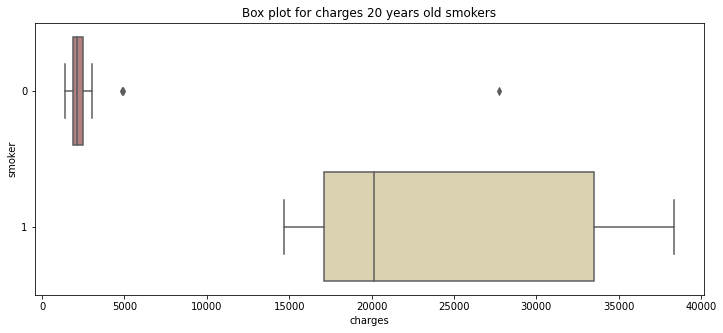

In [48]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 20 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 20)] , orient="h", palette = 'pink')

Oh, no. As can be seen, even at the age of 20, smokers spend significantly more on treatment than nonsmokers. We are seeing some " tails" among nonsmokers. This is most likely due to serious diseases or accidents. 



Let's look at how the cost of treatment varies depending on the age of smokers and non-smokers.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

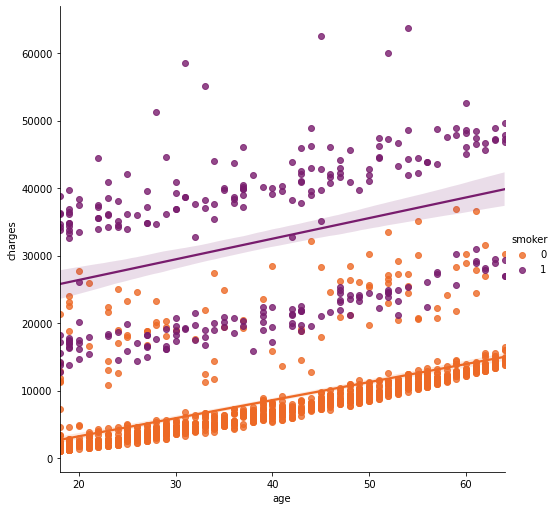

In [49]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')